<a href="https://colab.research.google.com/github/yongchenyen/Python/blob/main/%E5%88%86%E7%BE%A4%E6%96%B9%E6%B3%95_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_%E5%95%A4%E9%85%92%E6%B6%88%E8%B2%BB%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means中，我們主要用的模型在sklearn.cluster裡面的KMeans。

因此我們先把它載入起來

sklearn 中四種不同資料前處理方式

1.   StandardScaler (平均值和標準差)
2.   MinMaxScaler(最小最大值標準化)
3.   MaxAbsScaler（絕對值最大標準化）
4.   RobustScaler

加入 Seaborn 套件，matplotlib 為基礎建構的高階繪圖套件，讓使用者更加輕鬆地建立圖表

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

讀取資料

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/啤酒消費資料.csv')
df.head() #取前五筆資料

,客戶ID,每週平均購買金額(百),每週平均購買啤酒次數,每週平均購買啤酒數量(打)
0,A01,2.230,1.530,2.480
1,A02,2.121,1.764,2.363
2,A03,2.526,1.386,2.558
3,A04,2.330,1.620,2.570
4,A05,1.621,1.264,1.863


info：可以看到上面顯示了有哪些columns、大小和資料類型等等。

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   客戶ID           10 non-null     object 
 1   每週平均購買金額(百)    10 non-null     float64
 2   每週平均購買啤酒次數     10 non-null     float64
 3   每週平均購買啤酒數量(打)  10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 448.0+ bytes


shape：用於顯示(rows,columns)

In [ ]:
df.shape

(10, 4)

使用describe()可以用來一次求得

1.   均值(mean)
2.   標準差(std)
3.   min
4.   1/4位數
5.   中位數
6.   3/4位數
7.   max

In [ ]:
df.describe()

,每週平均購買金額(百),每週平均購買啤酒次數,每週平均購買啤酒數量(打)
count,10.000000,10.000000,10.00000
mean,2.303400,1.567300,2.53720
std,0.347951,0.307098,0.28749
min,1.621000,1.231000,1.86300
25%,2.148250,1.377000,2.48550
50%,2.326500,1.546500,2.56400
75%,2.394250,1.642500,2.65675
max,2.997000,2.291000,2.90900


載入中文字體

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-09-13 11:45:56--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.170.138, 142.251.170.139, 142.251.170.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.170.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aqcq01ppjotduqmi0dl8v1v6blupah00/1694605500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=411d7ef7-c9a0-40ff-9906-3268f9db592d [following]
--2023-09-13 11:46:00--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aqcq01ppjotduqmi0dl8v1v6blupah00/1694605500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=411d7ef7-c9a0-40ff-9906-3268f9db592d
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to d

我們先把資料轉換成圖示方式進行解析

plt.figure(figsize=(a, b)) a圖形寬， b 圖形高

plt.subplot(row, column, index) 列、欄位、第幾個圖

plt.subplots_adjust(hspace =0.5 , wspace = 0.5) 間距取50%

Seaborn is a library for making attractive and informative statistical graphics in Python.

import seaborn as sns

sns.distplot(df[i] , bins = 5) 畫圖，分成五個區間

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<ipython-input-19-d11ccc8d5f5c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins=5)
<ipython-input-19-d11ccc8d5f5c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins=5)
<ipython-input-19-d11ccc8d5f5c>:13: UserWarning: 

`distplot` is a deprecated function and will be rem

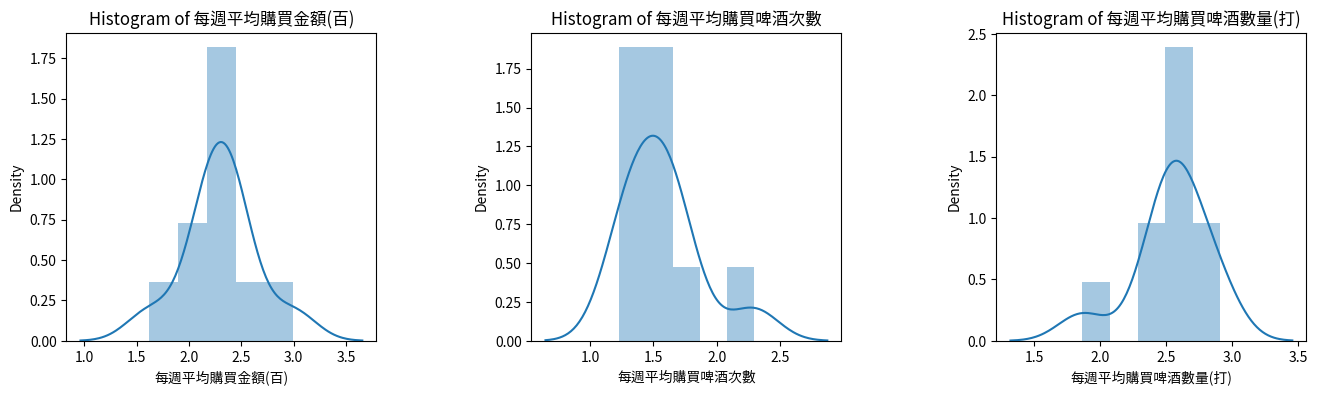

In [ ]:
#圖片顯示中文字體
from pylab import mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

plt.figure(figsize=(16,4)) #圖形(寬,高)
n = 0
for i in ['每週平均購買金額(百)', '每週平均購買啤酒次數', '每週平均購買啤酒數量(打)']:
  n += 1
  plt.subplot(1, 3, n) #列、欄位、第幾個圖
  plt.subplots_adjust(hspace=0.5, wspace=0.5) #間距取50%
  sns.distplot(df[i], bins=5) #畫圖，分成五個區間
  plt.title(f'Histogram of {i}')
plt.show()

繪製出不同的scatter來進行比較

Text(0, 0.5, '每週平均購買啤酒次數')

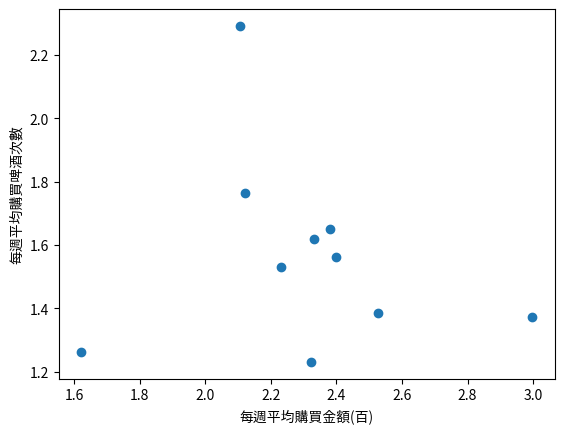

In [ ]:
plt.scatter(df['每週平均購買金額(百)'], df['每週平均購買啤酒次數'])

plt.xlabel('每週平均購買金額(百)')
plt.ylabel('每週平均購買啤酒次數')

繪製出不同的scatter來進行比較

Text(0, 0.5, '每週平均購買啤酒數量(打)')

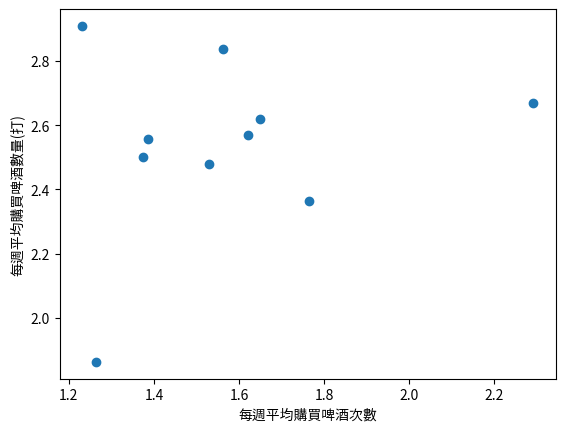

In [ ]:
plt.scatter(df['每週平均購買啤酒次數'], df['每週平均購買啤酒數量(打)'])

plt.xlabel('每週平均購買啤酒次數')
plt.ylabel('每週平均購買啤酒數量(打)')

繪製出不同的scatter來進行比較

Text(0, 0.5, '每週平均購買啤酒數量(打)')

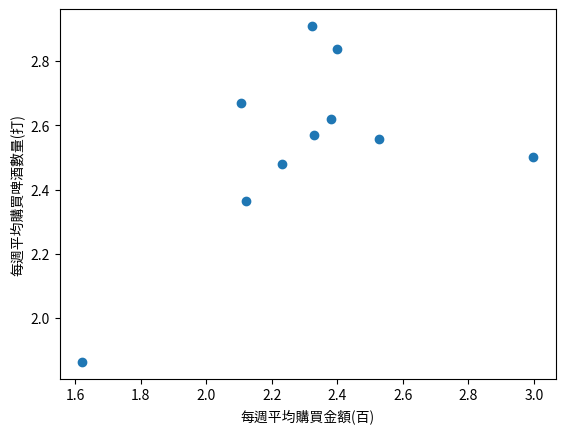

In [ ]:
plt.scatter(df['每週平均購買金額(百)'], df['每週平均購買啤酒數量(打)'])

plt.xlabel('每週平均購買金額(百)')
plt.ylabel('每週平均購買啤酒數量(打)')

標號數字不需進入訓練，先檢視一下原始的資料內容

In [ ]:
df.head()

,客戶ID,每週平均購買金額(百),每週平均購買啤酒次數,每週平均購買啤酒數量(打)
0,A01,2.230,1.530,2.480
1,A02,2.121,1.764,2.363
2,A03,2.526,1.386,2.558
3,A04,2.330,1.620,2.570
4,A05,1.621,1.264,1.863


移除不要的欄位，data frame 可以透過 drop()方法來刪除觀測值或欄位

axis = 0 表示要刪除觀測值（row），指定參數 axis =1 表示要刪除欄位（column）

In [ ]:
X = df.drop(['客戶ID'], axis=1)
print(X.head())

   每週平均購買金額(百)  每週平均購買啤酒次數  每週平均購買啤酒數量(打)
0        2.230       1.530          2.480
1        2.121       1.764          2.363
2        2.526       1.386          2.558
3        2.330       1.620          2.570
4        1.621       1.264          1.863


# 分群方法

將資料先設定我要分群的數量 k=3

找出他的重心 k 個聚類重心（centroids）

以新聚類平均找出新重心，重新對資料劃分歸屬

重複直到沒有資料點改變聚類歸屬。

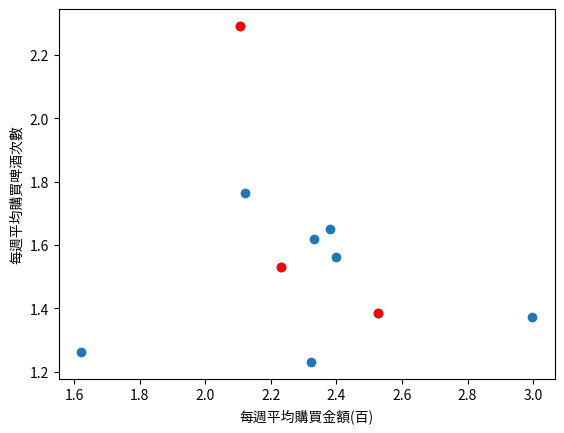

In [ ]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(df['每週平均購買金額(百)'], df['每週平均購買啤酒次數'])
plt.scatter(Centroids['每週平均購買金額(百)'], Centroids['每週平均購買啤酒次數'], c='red')
plt.xlabel('每週平均購買金額(百)')
plt.ylabel('每週平均購買啤酒次數')
plt.show()

檢查分群的標記資料

In [ ]:
Centroids

,每週平均購買金額(百),每週平均購買啤酒次數,每週平均購買啤酒數量(打)
0,2.230,1.530,2.480
6,2.107,2.291,2.669
2,2.526,1.386,2.558


再做一次計算

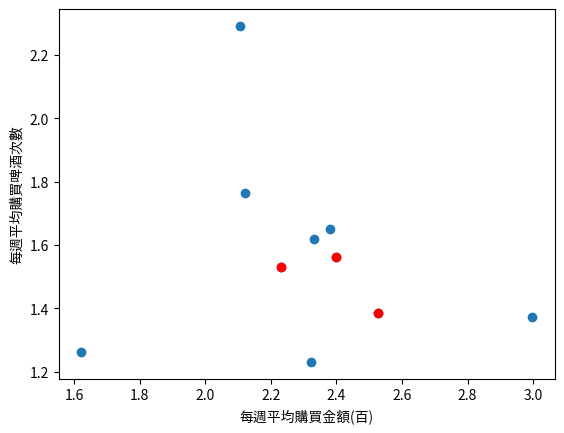

In [ ]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(df['每週平均購買金額(百)'], df['每週平均購買啤酒次數'])
plt.scatter(Centroids['每週平均購買金額(百)'], Centroids['每週平均購買啤酒次數'], c='red')
plt.xlabel('每週平均購買金額(百)')
plt.ylabel('每週平均購買啤酒次數')
plt.show()

再次檢查分群的標記資料

In [ ]:
Centroids

,每週平均購買金額(百),每週平均購買啤酒次數,每週平均購買啤酒數量(打)
8,2.399,1.563,2.838
0,2.230,1.530,2.480
2,2.526,1.386,2.558


# 建立群的模型
假設我們要分為三群，我們這邊就建立 n_clusters=3 init為k-means++，表示選擇k-means++演算法，指定變數model。

放入 model.fit(X) 訓練特徵，使用X當作特徵

n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。

n_cluster: K的大小，也就是分群的類別數量。

In [ ]:
model = KMeans(init = 'k-means++', n_clusters = 3)
model.fit(X)
print(model.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[2.114      2.0275     2.516     ]
 [2.455      1.47914286 2.63957143]
 [1.621      1.264      1.863     ]]


predict() 函數使我們能夠在訓練模型的基礎上預測數據值的標籤。

將所有資料分為幾個標號，我們先從模型中通過陣列印出

predict: 預測並回傳類別。

In [ ]:
model.predict(X)

array([1, 0, 1, 1, 2, 1, 0, 1, 1, 1], dtype=int32)

因為分成三群，把標籤印出

In [ ]:
df['群'] = model.labels_
print(df.groupby('群').mean())

   每週平均購買金額(百)  每週平均購買啤酒次數  每週平均購買啤酒數量(打)
群                                        
0        2.114    2.027500       2.516000
1        2.455    1.479143       2.639571
2        1.621    1.264000       1.863000


<ipython-input-34-94cebe4f828c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('群').mean())


繪製出依照model.labels_分群的結果

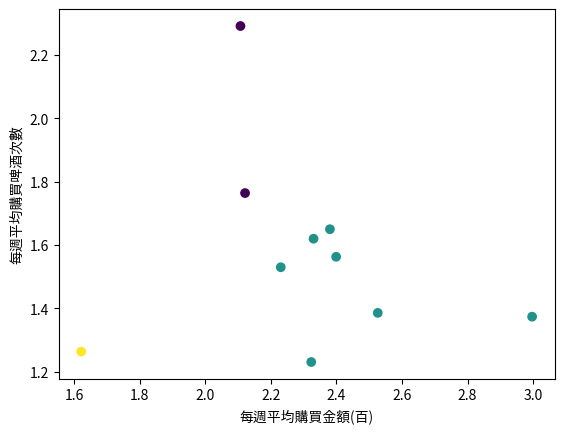

In [ ]:
plt.scatter(X['每週平均購買金額(百)'], X['每週平均購買啤酒次數'], c=model.labels_)
plt.xlabel('每週平均購買金額(百)')
plt.ylabel('每週平均購買啤酒次數')
plt.show()

更細分的推估，假設可以分成幾群

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

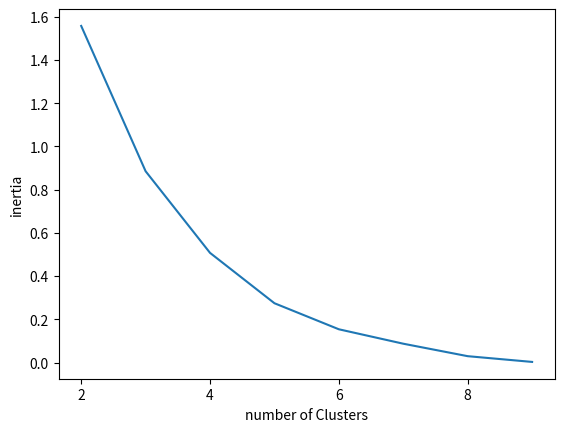

In [ ]:
iner = []
for i in range(2,10):
  model = KMeans(init = 'k-means++', n_clusters = i)
  model.fit(X)
  iner.append(model.inertia_) #inertia_：float，每個點到其他叢集的質心的距離之和。
plt.plot(range(2,10), iner)
plt.xlabel('number of Clusters')
plt.ylabel('inertia')
plt.xticks(range(2,10,2))
plt.show()

假如分成五群的結果

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[2.416      1.39333333 2.76833333]
 [2.26525    1.641      2.50825   ]
 [2.997      1.374      2.502     ]
 [1.621      1.264      1.863     ]
 [2.107      2.291      2.669     ]]


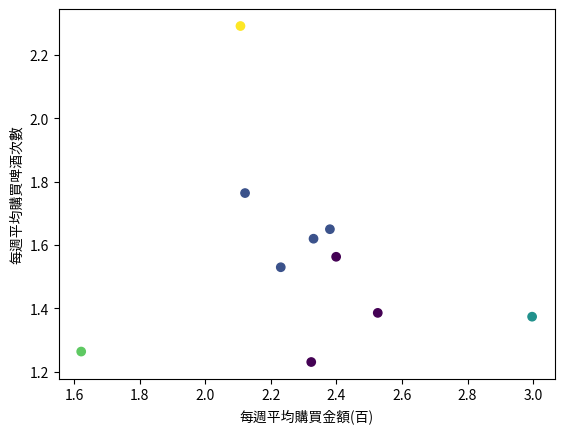

In [ ]:
model = KMeans(init = 'k-means++', n_clusters = 5)
model.fit(X)
print(model.cluster_centers_)
plt.scatter(X['每週平均購買金額(百)'], X['每週平均購買啤酒次數'], c=model.labels_)
plt.xlabel('每週平均購買金額(百)')
plt.ylabel('每週平均購買啤酒次數')
plt.show()

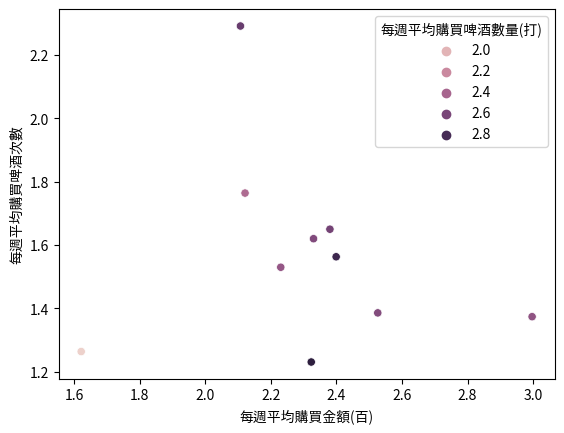

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
ax = sns.scatterplot(x=df['每週平均購買金額(百)'], y=df['每週平均購買啤酒次數'], hue=df['每週平均購買啤酒數量(打)'])